In [1]:
include("smc_model.jl")
include("smc_model_parameters.jl")
using DifferentialEquations
using Plots
gr()
using DataFrames

q0 = Control_params();
p0 = Fixed_params();
s0 = State();

In [2]:
q0_dict = type2dict(q0);
s0_dict = type2dict(s0);

delete!(q0_dict,Symbol("g_leak_mit"));
q0_dict[Symbol("k_leak_er")] = 0.0;
#q0_dict[Symbol("g_leak_ecs")] = 0.0;
delete!(q0_dict,Symbol("g_leak_ecs"));

delete!(q0_dict,Symbol("SERCA"));
#delete!(q0_dict,Symbol("Qpmca"));
q0_dict[Symbol("Qryr")]  = .2;
q0_dict[Symbol("SERCA_s")]  = 100;
q0_dict[Symbol("Qip3r")]  = 2000;
q0_dict[Symbol("MyoTot")] = 10.0;
q0_dict[Symbol("Vnclx")] = 0.128275;
q0_dict[Symbol("Qpmca")] = 1.0321099999999999;
q0_dict[Symbol("kncx2")] = 0.12480000000000002
q0_dict[Symbol("Qvocc")] = 0.19470239587882202;
q0_dict[Symbol("L")] = 0.0;


delete!(s0_dict,Symbol("IP3"));
delete!(s0_dict,Symbol("IP3RX00"));
delete!(s0_dict,Symbol("IP3RX10"));
delete!(s0_dict,Symbol("IP3RX01"));
delete!(s0_dict,Symbol("RyRR10"));
delete!(s0_dict,Symbol("RyRR11"));
delete!(s0_dict,Symbol("RyRR01"));
delete!(s0_dict,Symbol("MyoMp"));
delete!(s0_dict,Symbol("MyoAM"));
delete!(s0_dict,Symbol("MyoAMp"));
delete!(s0_dict,Symbol("G"));
delete!(s0_dict,Symbol("PIP2"));
delete!(s0_dict,Symbol("Rs"));
delete!(s0_dict,Symbol("Rsp"));

In [3]:
(q0_elevated,s0_elevated)=elevated(q0_dict; Ca_mit = 0.25);

# Benchmark test 

In [4]:
(output, problem, solution) = solveODEs(
    s0_elevated,q0_elevated,
    timespan=(0.0,60*30),
    fix = ["Ca_mit","Ca_ecs"]
    ,dtmax=100);

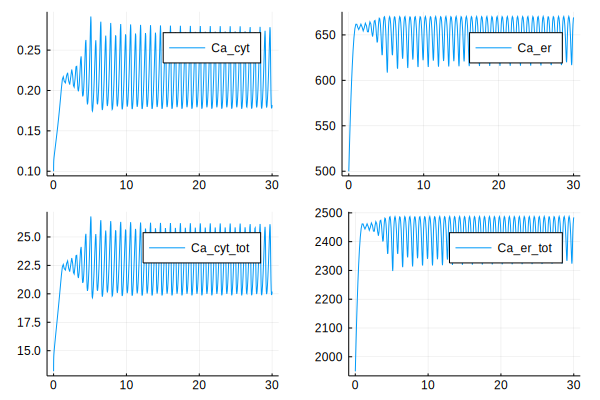

In [5]:
p1 = plot(output[:t]/60,output[:Ca_cyt],label="Ca_cyt")
p3 = plot(output[:t]/60,output[:other_Ca_cyt_tot],label="Ca_cyt_tot")

p2 = plot(output[:t]/60,output[:Ca_er],label="Ca_er")
p4 = plot(output[:t]/60,output[:other_Ca_er_tot],label="Ca_er_tot")

plot(p1,p2,p3,p4)

In [6]:
q0_elevated

Control_params
  SERCA: Float64 36.39583359577557
  SERCA_s: Float64 100.0
  Qryr: Float64 0.2
  Qip3r: Float64 2000.0
  Ca_er_infty: Float64 500.0
  k_leak_er: Float64 0.0
  Vnclx: Float64 0.128275
  Vmcu: Float64 4.398e-6
  g_leak_mit: Float64 0.010229628206348176
  Qncx: Float64 1.85
  Qpmca: Float64 1.0321099999999999
  Qvocc: Float64 0.19470239587882202
  kncx2: Float64 0.12480000000000002
  g_leak_ecs: Float64 0.0021307979513496373
  Ca_cyt_infty: Float64 0.1
  ATP_infty: Float64 3000.0
  ADP_infty: Float64 10.0
  MyoTot: Float64 10.0
  L: Float64 0.0


# Sensitivity


In [15]:
q_range=[[34,36],[90,110],[0.1,0.2],[0.01,0.02],[0.001,0.002],[0,0],[0.,0.2],[450,550],[3000,3000],[10,10],[0.1,0.3],[1910,2010],[9,10],[1,2],[1,1.1],[0.1,0.2],[0,0.00001],[0.1,0.2],[0,0.0]];
t = collect(range(0, stop=10, length=200))
q = [(q_range[j][2] -q_range[j][1])*rand() + q_range[j][1] for j in 1:length(q_range)];
f=getf(q,problem,t)

18×200 Array{Float64,2}:
    3.3199e-5      3.3199e-5      3.3199e-5   …     3.3199e-5      3.3199e-5 
    0.00738113     0.00738341     0.00738974        0.00874374     0.00874709
  118.513        118.513        118.513           118.504        118.504     
    0.747518       0.747504       0.747464          0.717125       0.716988  
    0.0048209      0.00482683     0.00484263        0.00678269     0.00678743
    0.243054       0.243056       0.243062    …     0.268558       0.268681  
    0.00327284     0.00328669     0.00332067        0.00510523     0.00511028
    5.84407e-6     5.92478e-6     6.05344e-6        1.14116e-5     1.14285e-5
    0.00177561     0.00179248     0.00181254        0.00221695     0.00221804
    0.0186988      0.0187133      0.0187544         0.0338778      0.0339225 
    0.0141832      0.0141843      0.0141877   …     0.0253661      0.02541   
    0.060612       0.060611       0.0606083         0.0762071      0.0763338 
    0.1            0.101233       0.102

In [21]:
N=10;
y0,v = calc_mean_var(problem,t,q_range,N);
y0

18×200 Array{Float64,2}:
    3.3199e-5      3.3199e-5      3.3199e-5   …     3.3199e-5      3.3199e-5 
    0.00738113     0.00738341     0.00738974        0.00874374     0.00874709
  118.513        118.513        118.513           118.504        118.504     
    0.747518       0.747504       0.747464          0.717125       0.716988  
    0.0048209      0.00482683     0.00484263        0.00678269     0.00678743
    0.243054       0.243056       0.243062    …     0.268558       0.268681  
    0.00327284     0.00328669     0.00332067        0.00510523     0.00511028
    5.84407e-6     5.92478e-6     6.05344e-6        1.14116e-5     1.14285e-5
    0.00177561     0.00179248     0.00181254        0.00221695     0.00221804
    0.0186988      0.0187133      0.0187544         0.0338778      0.0339225 
    0.0141832      0.0141843      0.0141877   …     0.0253661      0.02541   
    0.060612       0.060611       0.0606083         0.0762071      0.0763338 
    0.1            0.101233       0.102

In [22]:
first_order_var(problem,t,q_range,N,y0)

19-element Array{Array{Float64,2},1}:
 [0.0 0.0 … 1.07947e-22 1.07947e-22; 2.03288e-20 -1.20617e-18 … 1.00966e-16 1.19344e-16; … ; 0.0 -6.65505e-19 … 8.95367e-13 3.17385e-13; 0.0 1.39666e-12 … -2.42391e-7 -1.4533e-7]                     
 [0.0 0.0 … 9.47122e-23 9.42986e-23; 2.03288e-20 -2.6563e-18 … -4.30035e-16 -5.51845e-16; … ; 0.0 -5.03298e-19 … -4.84862e-13 -5.28771e-13; 0.0 1.81455e-12 … -1.71131e-8 -3.60451e-8]                 
 [0.0 0.0 … 6.07978e-23 6.03842e-23; 1.35525e-20 -3.15774e-18 … 1.11673e-16 1.03284e-16; … ; 0.0 -1.06947e-18 … 5.22585e-12 4.70143e-12; 0.0 -4.7562e-13 … -5.0207e-7 -3.97646e-7]                     
 [0.0 0.0 … 9.34714e-23 9.26442e-23; 2.03288e-20 -3.41524e-18 … 4.92092e-17 1.16687e-17; … ; 0.0 -2.94786e-19 … 2.59032e-12 2.3628e-12; 0.0 -2.70894e-14 … -3.11789e-7 -2.72354e-7]                    
 [0.0 0.0 … 5.2526e-23 5.21124e-23; 2.03288e-20 -1.44334e-18 … -2.06188e-16 -2.87693e-16; … ; 0.0 -1.35005e-18 … 1.50777e-12 1.18142e-12; 0.0 -3.40172e-13 … -2.76

In [29]:
second_order = second_order_var(problem,t,q_range,N,y0)
for i in 1:length(second_order)
    second_order[i] = @. second_order[i] / v;

end
second_order

171-element Array{Array{Float64,2},1}:
 [-0.0 -0.0 … 164.5 164.5; -2.0 -16.0 … -18260.0 13412.0; … ; NaN -483878.0 … Inf -61791.0; NaN -7643.0 … 3466.0 10550.0]   
 [-2.0 -2.0 … 199.5 199.0; -1.0 -58.5 … 5889.0 -3216.5; … ; NaN -1.18199e6 … -Inf 19923.0; NaN -4419.0 … -7150.0 -11889.0]  
 [-1.0 -1.0 … 27.0 28.0; -1.5 -69.5 … -9071.0 6489.0; … ; NaN -1.64879e6 … -Inf 13160.0; NaN -6750.0 … -22565.5 -31605.0]   
 [-1.0 -1.0 … 65.0 65.5; -1.5 -151.0 … -76485.0 45552.0; … ; NaN -1.42339e6 … -Inf 17529.5; NaN 2773.0 … -32333.5 -37674.0] 
 [-2.0 -2.0 … 319.0 318.0; -1.0 43.0 … -2012.0 2856.5; … ; NaN -875782.0 … Inf -13673.0; NaN -3170.0 … -2976.5 -5025.0]     
 [-1.0 -1.0 … 250.0 248.0; -2.5 -171.5 … -9661.0 6730.0; … ; NaN -1.57888e6 … Inf -21231.0; NaN -2680.0 … -1031.5 -148.0]   
 [-1.0 -1.0 … 226.0 226.5; -2.5 -97.0 … -39548.0 22744.5; … ; NaN -1.24188e6 … -Inf 67877.0; NaN -759.0 … -30233.0 -43952.0]
 [-0.0 -0.0 … 158.0 158.5; -2.0 -134.5 … 1727.0 306.5; … ; NaN -744616.0 … Inf -12270.

In [36]:
problem

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 1800.0)
u0: [3.3199e-5, 0.00738113, 118.513, 0.747518, 0.0048209, 0.243054, 0.00327284, 5.84407e-6, 0.00177561, 0.0186988, 0.0141832, 0.060612, 0.1, 500.0, 1300.0, 0.25, 0.0, 0.0]

In [37]:
problem.problem_type

DiffEqBase.StandardODEProblem()

In [57]:
rd = [1 1 1 0.1]
t = collect(range(0, stop=10, length=200))
getf_new(rd,q0_elevated,s0_elevated,t)   

18×200 Array{Float64,2}:
    3.3199e-5      3.3199e-5    …     3.3199e-5       3.3199e-5  
    0.00738113     0.00738113         0.00738113      0.00738113 
  118.513        118.513            118.513         118.513      
    0.747518       0.747518           0.747518        0.747518   
    0.0048209      0.0048209          0.0048209       0.0048209  
    0.243054       0.243054     …     0.243054        0.243054   
    0.00327284     0.00327284         0.00327284      0.00327284 
    5.84407e-6     5.84407e-6         5.84407e-6      5.84407e-6 
    0.00177561     0.00177561         0.00177561      0.00177561 
    0.0186988      0.0186988          0.0186988       0.0186988  
    0.0141832      0.0141832    …     0.0141832       0.0141832  
    0.060612       0.060612           0.060612        0.060612   
    0.1            0.1                0.1             0.1        
  500.0          500.0              500.0           500.0        
 1300.0         1300.0             1300.0          

In [58]:
s0_etest = reconstruct(s0_elevated, Ca_mit = 0.3)

State
  Ca_cyt: Float64 0.1
  Ca_er: Float64 500.0
  Ca_ecs: Float64 1300.0
  Ca_mit: Float64 0.3
  Ca_mit_source: Float64 0.0
  Ca_ecs_source: Float64 0.0
  Na_cyt: Float64 1000.0
  Na_ecs: Float64 138000.0
  K_cyt: Float64 140000.0
  K_ecs: Float64 3500.0
  Phi_mit: Float64 160.0
  Phi_ecs: Float64 -54.03
  RyRR10: Float64 0.003272844453161682
  IP3RX00: Float64 0.7475182747791805
  IP3RX01: Float64 0.24305426733899088
  IP3RX10: Float64 0.00482090403003259
  RyRR11: Float64 5.844071428483013e-6
  MyoMp: Float64 0.01869880291294156
  MyoAMp: Float64 0.014183208692474311
  IP3: Float64 0.007381134758775144
  RyRR01: Float64 0.001775610994991665
  MyoAM: Float64 0.06061200295929193
  ATP: Float64 3000.0
  ADP: Float64 300.0
  Glu: Float64 1.0
  pH_cyt: Float64 7.1
  pH_mit: Float64 7.8
  G: Float64 3.319900335449676e-5
  PIP2: Float64 118.51306047380106


In [7]:
p_range=[[0.1,10],[0.1,10],[0.1,10],[0.1,10]]
rd = give_rand_p_new(p_range)

4-element Array{Float64,1}:
 4.005083557079318 
 2.4243156587372496
 0.2652959377343334
 1.7835131771514263

In [8]:
p_range=[[0.1,10],[0.1,10],[0.1,10],[0.1,10]]
rd = give_rand_p_new(p_range)
t = collect(range(0, stop=60*20, length=1200))
getf_new(rd,q0_elevated,s0_elevated,t)   

18×1200 Array{Float64,2}:
    3.3199e-5      3.3199e-5      3.3199e-5   …     3.3199e-5      3.3199e-5 
    0.00738113     0.00734735     0.00732181        0.00616878     0.00616878
  118.513        118.513        118.513           118.529        118.529     
    0.747518       0.747755       0.74805           0.788386       0.788386  
    0.0048209      0.00476417     0.00473385        0.00341257     0.00341257
    0.243054       0.242936       0.242708    …     0.205581       0.205581  
    0.00327284     0.00320995     0.00319251        0.00211173     0.00211173
    5.84407e-6     5.67364e-6     5.62837e-6        3.02666e-6     3.02666e-6
    0.00177561     0.00175777     0.00175331        0.00142767     0.00142767
    0.0186988      0.0184634      0.0182485         0.0100757      0.0100757 
    0.0141832      0.0141307      0.0140195   …     0.00720214     0.00720214
    0.060612       0.0606241      0.0606055         0.0331009      0.0331009 
    0.1            0.098982       0.09

In [ ]:
N=1000
using JLD
p_range=[[0.1,10],[0.1,10],[0.1,10],[0.1,10]]
rd = give_rand_p_new(p_range)
t = collect(range(0, stop=60*20, length=120))
y0,v = calc_mean_var_new(q0_elevated,s0_elevated,t,p_range,N)
save("y0_data_sen.jld", "data", y0)
save("v_data_sen.jld", "data", v)
fs = first_order_var_new(q0_elevated,s0_elevated,t,p_range,N,y0);
save("fs_data_sen.jld", "data",fs)
 
ss = second_order_var_new(q0_elevated,s0_elevated,t,p_range,N,y0)
save("ss_data_sen.jld", "data",ss)

In [ ]:
first_order_var_new(q0_elevated,s0_elevated,t,p_range,N,y0)


In [ ]:

second_order_var_new(q0_elevated,s0_elevated,t,p_range,N,y0)